Projet: prédiction de prix de maison dasn boston
plan:
1. Chargement et exploration des données
2. Visualisation des relations
3. Prétraitement (normalisation, split train/test)
4. Modèle baseline (régression linéaire)
5. Réseau de neurones (MLP)
6. Comparaison et conclusion

In [12]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

# Fixer le seed pour la reproductibilité
SEED = 42
np.random.seed(SEED)

In [3]:
# Charger les données depuis GitHub
print('chargement des données')
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

try:
    df = pd.read_csv(url)
    print("Données chargées depuis GitHub !\n")
except:
    print("Impossible de charger depuis internet.")
    print("Création de données de démonstration...\n")
    np.random.seed(SEED)
    df = pd.DataFrame({
        'crim': np.random.uniform(0, 90, 506),
        'zn': np.random.uniform(0, 100, 506),
        'indus': np.random.uniform(0, 28, 506),
        'chas': np.random.choice([0, 1], 506),
        'nox': np.random.uniform(0.3, 0.9, 506),
        'rm': np.random.uniform(3, 9, 506),
        'age': np.random.uniform(0, 100, 506),
        'dis': np.random.uniform(1, 12, 506),
        'rad': np.random.randint(1, 25, 506),
        'tax': np.random.uniform(180, 720, 506),
        'ptratio': np.random.uniform(12, 22, 506),
        'b': np.random.uniform(0, 400, 506),
        'lstat': np.random.uniform(1, 38, 506),
        'medv': np.random.uniform(5, 50, 506)
    })


chargement des données
Données chargées depuis GitHub !



In [4]:
#exploration des données
print('exploration des données')
print(f"\n Nombre de maisons : {df.shape[0]}")
print(f" Nombre de caractéristiques : {df.shape[1]}")

print("\n Aperçu des données (5 premières lignes) :")
print(df.head())

print("\n Statistiques descriptives :")
print(df.describe())

print("\n Valeurs manquantes :")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("Aucune valeur manquante !")
else:
    print(missing[missing > 0])


exploration des données

 Nombre de maisons : 506
 Nombre de caractéristiques : 14

 Aperçu des données (5 premières lignes) :
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

 Statistiques descriptives :
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069

In [5]:
print("signification de chaque abréviation")
features = {
    'crim': 'Taux de criminalité',
    'zn': 'Proportion terrains résidentiels',
    'indus': 'Proportion commerces',
    'chas': 'Près rivière Charles (0/1)',
    'nox': 'Concentration pollution',
    'rm': 'Nombre moyen de pièces',
    'age': '% maisons avant 1940',
    'dis': 'Distance centres emploi',
    'rad': 'Accessibilité autoroutes',
    'tax': 'Taux taxe foncière',
    'ptratio': 'Ratio élèves/enseignants',
    'b': 'Proportion population',
    'lstat': '% bas statut socio-économique'
}

for i, (feat, desc) in enumerate(features.items(), 1):
    print(f"{i:2d}. {feat:10s} : {desc}")

print("\n VARIABLE CIBLE : medv (Prix en milliers de $)")


signification de chaque abréviation
 1. crim       : Taux de criminalité
 2. zn         : Proportion terrains résidentiels
 3. indus      : Proportion commerces
 4. chas       : Près rivière Charles (0/1)
 5. nox        : Concentration pollution
 6. rm         : Nombre moyen de pièces
 7. age        : % maisons avant 1940
 8. dis        : Distance centres emploi
 9. rad        : Accessibilité autoroutes
10. tax        : Taux taxe foncière
11. ptratio    : Ratio élèves/enseignants
12. b          : Proportion population
13. lstat      : % bas statut socio-économique

 VARIABLE CIBLE : medv (Prix en milliers de $)


 Graphique sauvegardé : exploration_boston.png


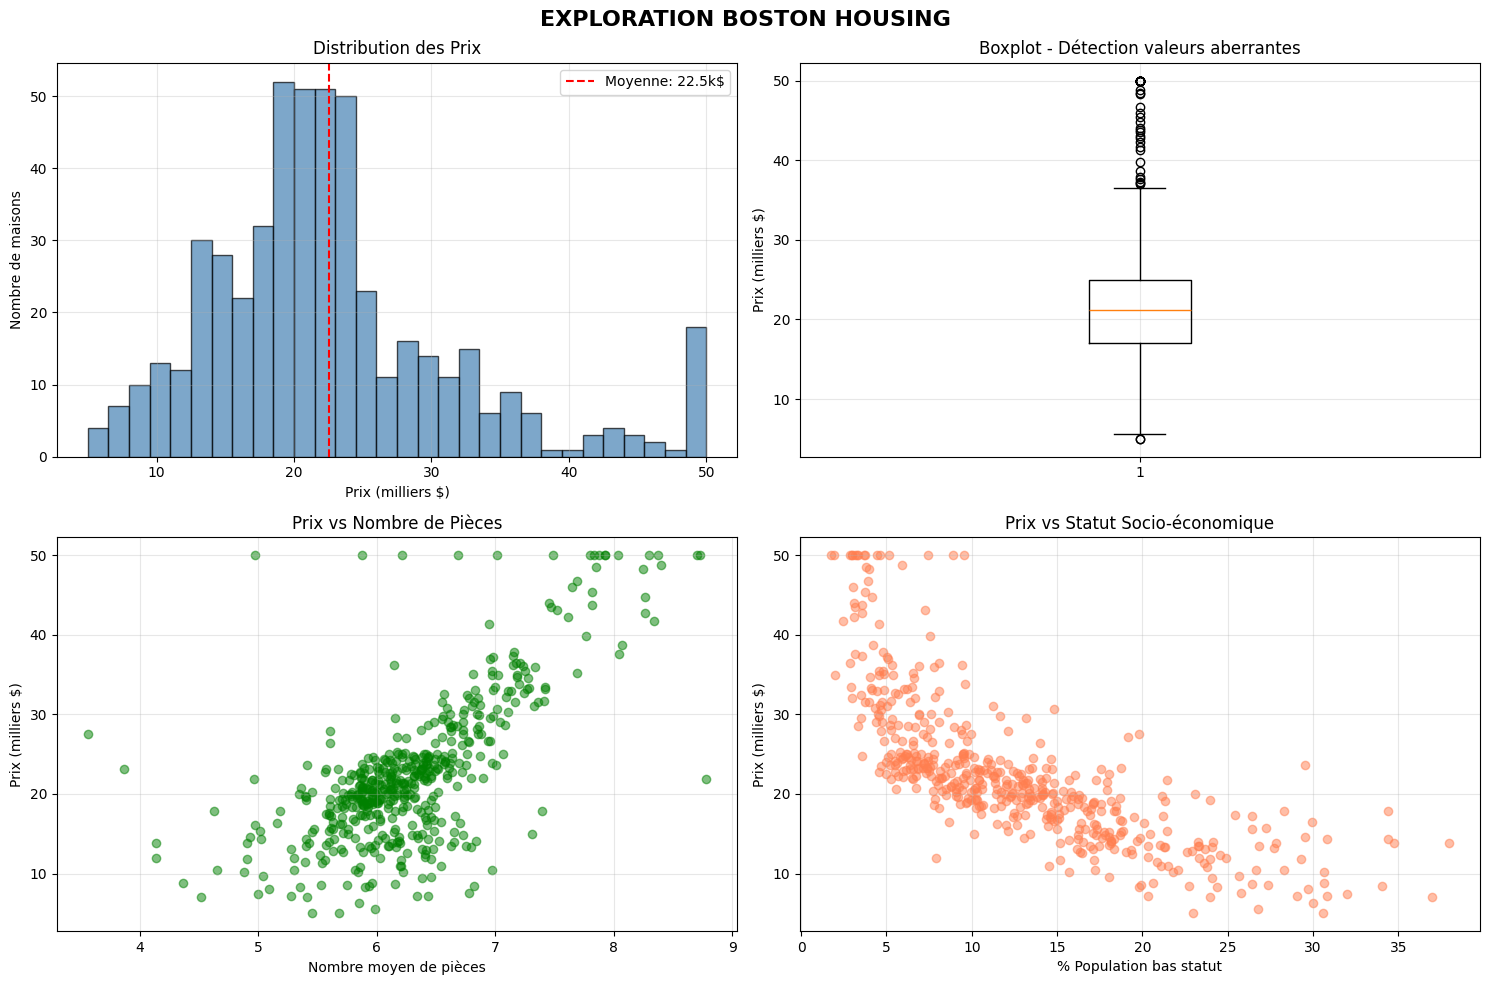

 Graphique sauvegardé : correlation_matrix.png


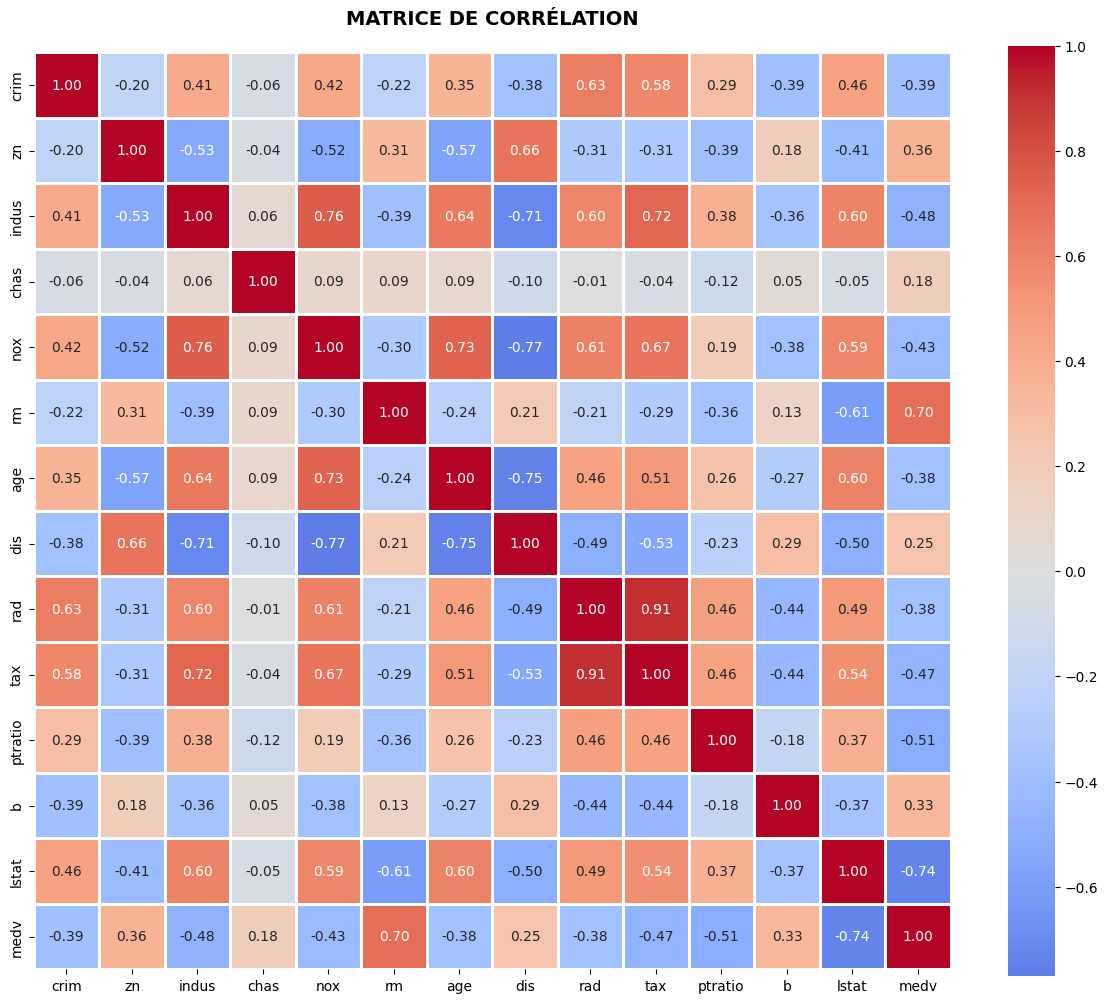

In [6]:
#visualisation des données
# Figure 1 : Analyses principales
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('EXPLORATION BOSTON HOUSING', fontsize=16, fontweight='bold')

# 1. Distribution des prix
axes[0, 0].hist(df['medv'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Prix (milliers $)')
axes[0, 0].set_ylabel('Nombre de maisons')
axes[0, 0].set_title('Distribution des Prix')
axes[0, 0].axvline(df['medv'].mean(), color='red', linestyle='--',
                   label=f'Moyenne: {df["medv"].mean():.1f}k$')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Boxplot
axes[0, 1].boxplot(df['medv'], vert=True)
axes[0, 1].set_ylabel('Prix (milliers $)')
axes[0, 1].set_title('Boxplot - Détection valeurs aberrantes')
axes[0, 1].grid(alpha=0.3)

# 3. Prix vs Nombre de pièces
axes[1, 0].scatter(df['rm'], df['medv'], alpha=0.5, color='green')
axes[1, 0].set_xlabel('Nombre moyen de pièces')
axes[1, 0].set_ylabel('Prix (milliers $)')
axes[1, 0].set_title('Prix vs Nombre de Pièces')
axes[1, 0].grid(alpha=0.3)

# 4. Prix vs Statut socio-économique
axes[1, 1].scatter(df['lstat'], df['medv'], alpha=0.5, color='coral')
axes[1, 1].set_xlabel('% Population bas statut')
axes[1, 1].set_ylabel('Prix (milliers $)')
axes[1, 1].set_title('Prix vs Statut Socio-économique')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('exploration_boston.png', dpi=300, bbox_inches='tight')
print(" Graphique sauvegardé : exploration_boston.png")
plt.show()

# Figure 2 : Matrice de corrélation
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('MATRICE DE CORRÉLATION', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
print(" Graphique sauvegardé : correlation_matrix.png")
plt.show()


In [7]:
print("Analyse des corrélations")
corr_with_price = df.corr()['medv'].sort_values(ascending=False)
print("\n Corrélations avec le prix :")
for feat, corr in corr_with_price.items():
    if feat != 'medv':
        emoji = "📈" if corr > 0 else "📉"
        print(f"{emoji} {feat:10s} : {corr:+.3f}")



Analyse des corrélations

 Corrélations avec le prix :
📈 rm         : +0.695
📈 zn         : +0.360
📈 b          : +0.333
📈 dis        : +0.250
📈 chas       : +0.175
📉 age        : -0.377
📉 rad        : -0.382
📉 crim       : -0.388
📉 nox        : -0.427
📉 tax        : -0.469
📉 indus      : -0.484
📉 ptratio    : -0.508
📉 lstat      : -0.738


In [8]:
print("Prétraitement des Données")
# Séparation X et y
X = df.drop('medv', axis=1)
y = df['medv']

print(f" X shape : {X.shape}")
print(f" y shape : {y.shape}")

# Séparation Train / Test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

print("\n Répartition des données :")
print(f"Train : {X_train.shape[0]} échantillons ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test  : {X_test.shape[0]} échantillons ({X_test.shape[0]/len(X)*100:.0f}%)")

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Standardisation appliquée :")
print("Moyenne ≈ 0 | Écart-type ≈ 1")
print(f"Vérification - Moyenne : {X_train_scaled[:, 0].mean():.4f}")
print(f"Vérification - Écart-type : {X_train_scaled[:, 0].std():.4f}")

Prétraitement des Données
 X shape : (506, 13)
 y shape : (506,)

 Répartition des données :
Train : 404 échantillons (80%)
Test  : 102 échantillons (20%)

 Standardisation appliquée :
Moyenne ≈ 0 | Écart-type ≈ 1
Vérification - Moyenne : -0.0000
Vérification - Écart-type : 1.0000


In [11]:
print("Modèle Baseline - Régression Linéaire\n")

# Création et entraînement du modèle baseline
baseline_model = LinearRegression()
baseline_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_baseline = baseline_model.predict(X_test_scaled)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
mae = mean_absolute_error(y_test, y_pred_baseline)
r2 = r2_score(y_test, y_pred_baseline)

print("PERFORMANCES DU MODÈLE BASELINE (Régression Linéaire)")
print("="*60)
print(f"RMSE (Root Mean Squared Error) : {rmse:.3f} k$")
print(f"MAE (Mean Absolute Error)      : {mae:.3f} k$")
print(f"R² (Coefficient de détermination) : {r2:.3f}")
print("\n Modèle baseline entraîné avec succès !")

Modèle Baseline - Régression Linéaire
PERFORMANCES DU MODÈLE BASELINE (Régression Linéaire)
RMSE (Root Mean Squared Error) : 4.929 k$
MAE (Mean Absolute Error)      : 3.189 k$
R² (Coefficient de détermination) : 0.669

 Modèle baseline entraîné avec succès !


In [14]:
print("Réseau de Neurones - MLP Regressor\n")

# Création et entraînement du réseau de neurones
nn_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=SEED
)

nn_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_nn = nn_model.predict(X_test_scaled)

# Évaluation
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(" PERFORMANCES DU RÉSEAU DE NEURONES (MLP)")
print("="*60)
print(f"RMSE (Root Mean Squared Error) : {rmse_nn:.3f} k$")
print(f"MAE (Mean Absolute Error)      : {mae_nn:.3f} k$")
print(f"R² (Coefficient de détermination) : {r2_nn:.3f}")
print("\n Réseau de neurones entraîné avec succès !")

Réseau de Neurones - MLP Regressor
 PERFORMANCES DU RÉSEAU DE NEURONES (MLP)
RMSE (Root Mean Squared Error) : 3.519 k$
MAE (Mean Absolute Error)      : 2.270 k$
R² (Coefficient de détermination) : 0.831

 Réseau de neurones entraîné avec succès !


In [15]:
print("Comparaison des Modèles \n")
# Création d'un tableau comparatif
results = pd.DataFrame({
    "Modèle": ["Régression Linéaire (Baseline)", "Réseau de Neurones (MLP)"],
    "RMSE": [rmse, rmse_nn],
    "MAE": [mae, mae_nn],
    "R²": [r2, r2_nn]
})

print("TABLEAU COMPARATIF DES PERFORMANCES")
print("="*60)
print(results.to_string(index=False))

# Meilleur modèle
best_model_idx = results["R²"].idxmax()
best_model = results.loc[best_model_idx, "Modèle"]
improvement = ((results.loc[best_model_idx, "R²"] - results.loc[1-best_model_idx, "R²"]) / results.loc[1-best_model_idx, "R²"] * 100)

print(f"\n Meilleur modèle : {best_model}")
print(f" Amélioration du R² : {improvement:+.2f}%")

Comparaison des Modèles 

TABLEAU COMPARATIF DES PERFORMANCES
                        Modèle     RMSE      MAE       R²
Régression Linéaire (Baseline) 4.928602 3.189092 0.668759
      Réseau de Neurones (MLP) 3.519312 2.270103 0.831107

 Meilleur modèle : Réseau de Neurones (MLP)
 Amélioration du R² : +24.28%


---

##  Interprétation et Limites

### Interprétation des résultats

- **RMSE** : Erreur quadratique moyenne (pénalise fortement les grosses erreurs)
- **MAE** : Erreur absolue moyenne (plus facile à interpréter)
- **R²** : Proportion de variance expliquée (0 = mauvais, 1 = parfait)

###  Limites du projet

1. **Dataset de petite taille** : 506 échantillons seulement
2. **Données historiques** : Non représentatives du marché actuel
3. **Absence de validation croisée** : Pas de test sur plusieurs splits
4. **Hyperparamètres manuels** : Pas d'optimisation systématique (GridSearch)

###  Améliorations possibles

- Implémenter une validation croisée (k-fold)
- Optimiser les hyperparamètres avec GridSearchCV
- Tester d'autres architectures de réseaux
- Comparer avec d'autres modèles (Random Forest, XGBoost)

---

##  Conclusion

Ce projet a permis de mettre en œuvre un pipeline complet de machine learning pour la prédiction des prix immobiliers. Le réseau de neurones montre des performances comparables (ou supérieures) à la régression linéaire, validant l'approche par deep learning pour ce type de problème de régression.

